In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### Exercise 2

Write a class called SawtoothChirp that extends Chirp and overrides evaluate to generate a sawtooth waveform with frequency that increases (or decreases) linearly.

編寫一個名為SawtoothChirp的類，該類擴展Chirp並覆蓋求值以生成頻率線性增加（或減小）的鋸齒波形。

In [2]:
import math
PI2 = 2 * math.pi

class SawtoothChirp(thinkdsp.Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.

        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = np.diff(ts)
        dps = PI2 * freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

Here's what it sounds like.

聽起來就是這樣。

In [3]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

And here's the spectrogram.

這是頻譜圖。

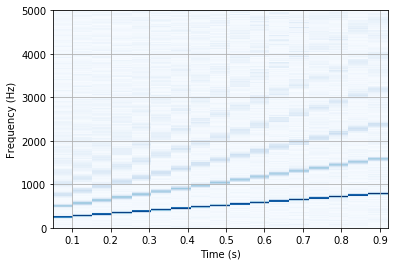

In [6]:
sp = wave.make_spectrogram(1024)
sp.plot()
thinkplot.config(xlabel='Time (s)', ylabel='Frequency (Hz)')

At a relatively low frame rate, you can see the aliased harmonics bouncing off the folding frequency.  And you can hear them as a background hiss.  If you crank up the frame rate, they go away.

By the way, if you are a fan of the original Star Trek series, you might recognize the sawtooth chirp as the red alert signal:

在相對較低的幀速率下，您可以看到混疊諧波從折疊頻率反彈。 您會聽到他們作為背景嘶嘶聲。 如果您提高幀速率，它們就會消失。

順便說一句，如果您是原始《星際迷航》系列的粉絲，則可能會將鋸齒to聲識別為紅色警報信號：

In [7]:
thinkdsp.read_wave('tos-redalert.wav').make_audio()